<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/mri_io_to_whole_brain_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download MRI

In [3]:
import gdown
url = 'https://drive.google.com/uc?id=1qsmHsz7bmXaFMZpab6DIWyqa3d44rYds'
gdown.download(url,'TSH86_Stealth_t1_2.nii.gz',quiet=True) 

'TSH86_Stealth_t1_2.nii.gz'

Installation

In [8]:
!pip -q install nilearn nibabel SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.3 MB/s eta 0:00:00


Using Nibable and Nilearn

In [11]:
from nilearn.masking import compute_epi_mask
import nibabel as nib

path = 'TSH86_Stealth_t1_2.nii.gz'
mask_img = compute_epi_mask(path)
nib.save(mask_img,'TSH86_Stealth_t1_2_whole_brain_mask.nii.gz')
mask_img.shape

(512, 512, 144)

Using nibabel only

In [13]:
import nibabel as nib
import numpy as np
img = nib.load(path)
img_array = img.get_fdata()
mri_mask = (img_array>0).astype(int)
img_nifti = nib.Nifti1Image(mri_mask, img.affine, header=img.header)
nib.save(img_nifti,'mask_nibabel.nii.gz') #not as expected

Using SimpleITK<br>
Resampling: https://github.com/mobarakol/lidc-preproc/blob/master/preproc.py


In [24]:
import SimpleITK as sitk
img = sitk.ReadImage(path)
img_array = sitk.GetArrayFromImage(img)
img_mask = sitk.GetImageFromArray(img_array)
img_mask.SetSpacing(img.GetSpacing())
img_mask.SetDirection(img.GetDirection())
img_mask.SetOrigin(img.GetOrigin())
writer = sitk.ImageFileWriter()
writer.SetFileName('mask_sitk.nii.gz')
writer.Execute(img_mask)
img_array.shape

(144, 512, 512)

Using Skimage

In [10]:
from skimage import io
img_array = io.imread(path, plugin='simpleitk').astype(float)
img_array.shape

(144, 512, 512)

Public MRI dataset<br>
Python Lib:

In [25]:
from nilearn import datasets

# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
func_filename = haxby_dataset.func[0]


Dataset created in /root/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
Downloaded 241336320 of 291168628 bytes (82.9%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/def37a305edfda829916fa14c9ea08f8/subj2-2010.01.14.tar.gz..... done.


Public Repo

In [26]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573
Receiving objects: 100% (1601/1601), 720.36 MiB | 31.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [27]:
!pip -q install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00


In [35]:
image_data.shape[2] - 1

154

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

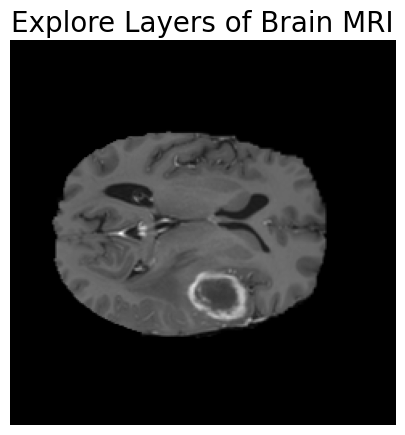

In [40]:
import numpy as np
import nibabel as nib

from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt

# Define the image path and load the data
image_path = "BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
image_data = image_obj.get_fdata()
print(f'Type of the image {type(image_obj)}')

# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…

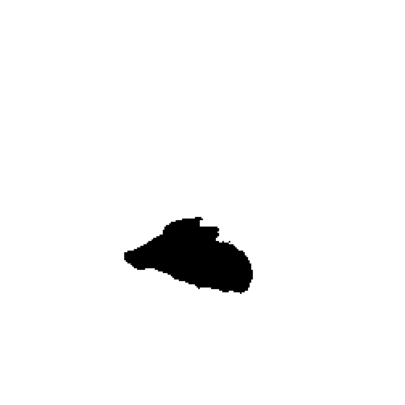

In [45]:
# Define the data path and load the data
label_path = "./BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
label_array = label_obj.get_fdata()
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)

classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}
# layer = 55
# Create layer slider
# select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=(0, image_data.shape[2] - 1))